# Set up

In [1]:
import altair as alt
import pandas as pd

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

# Load data 

In [2]:
raw_data = pd.read_csv("../data/raw/survey.csv")

In [3]:
raw_data.shape

(1259, 27)

In [4]:
raw_data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Extract data 
- Timestamp, Country, family_history, Gender, seek_help, benefits

In [5]:
processed_data = raw_data[["Timestamp", "Country", "family_history", "Gender", "seek_help", "benefits"]]
processed_data.head()

,Timestamp,Country,family_history,Gender,seek_help,benefits
0,2014-08-27 11:29:31,United States,No,Female,Yes,Yes
1,2014-08-27 11:29:37,United States,No,M,Don't know,Don't know
2,2014-08-27 11:29:44,Canada,No,Male,No,No
3,2014-08-27 11:29:46,United Kingdom,Yes,Male,No,No
4,2014-08-27 11:30:22,United States,No,Male,Don't know,Yes


- Data cleaning for "Gender"

In [6]:
set(processed_data["Gender"])

{'A little about you',
 'Agender',
 'All',
 'Androgyne',
 'Cis Female',
 'Cis Male',
 'Cis Man',
 'Enby',
 'F',
 'Femake',
 'Female',
 'Female ',
 'Female (cis)',
 'Female (trans)',
 'Genderqueer',
 'Guy (-ish) ^_^',
 'M',
 'Mail',
 'Make',
 'Mal',
 'Male',
 'Male ',
 'Male (CIS)',
 'Male-ish',
 'Malr',
 'Man',
 'Nah',
 'Neuter',
 'Trans woman',
 'Trans-female',
 'Woman',
 'cis male',
 'cis-female/femme',
 'f',
 'femail',
 'female',
 'fluid',
 'm',
 'maile',
 'male',
 'male leaning androgynous',
 'msle',
 'non-binary',
 'ostensibly male, unsure what that really means',
 'p',
 'queer',
 'queer/she/they',
 'something kinda male?',
 'woman'}

In [7]:
processed_data = processed_data[(processed_data['Gender'] == "Male") | (processed_data['Gender'] == "M") | 
                      (processed_data['Gender'] == "m") | (processed_data['Gender'] == "male") | 
                      (processed_data['Gender'] == "Female") | (processed_data['Gender'] == "female") | 
                      (processed_data['Gender'] == "f") | (processed_data['Gender'] == "F")]

In [8]:
processed_data.shape

(1207, 6)

In [9]:
processed_data['Gender'] = processed_data['Gender'].replace(['Male', "m", "male"],'M')
processed_data['Gender'] = processed_data['Gender'].replace(['Female', "f", "female"],'F')

In [10]:
set(processed_data["Gender"])

{'F', 'M'}

In [11]:
processed_data.to_csv("../data/processed/processed_survey.csv")

# Plot

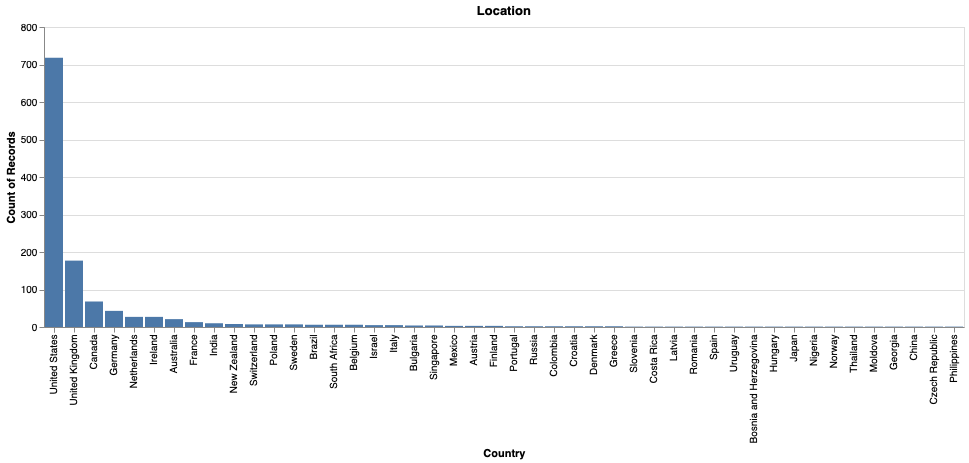

In [12]:
alt.Chart(processed_data, title='Location').mark_bar().encode(
    x=alt.X('Country', sort='-y'),
    y='count()',tooltip='Country')

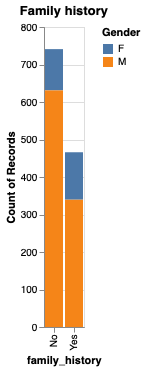

In [32]:
alt.Chart(processed_data, title='Family history').mark_bar().encode(
    x=alt.X('family_history'),
    y='count()', 
    color='Gender', 
    tooltip='Gender')  

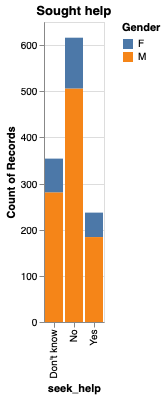

In [28]:
alt.Chart(processed_data, title='Sought help').mark_bar().encode(
    x=alt.X('seek_help'),
    y=alt.Y('count()'), color='Gender', tooltip='Gender')

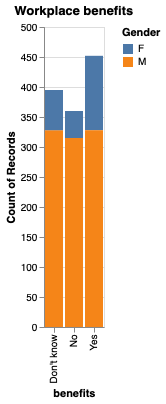

In [17]:
alt.Chart(processed_data, title='Workplace benefits').mark_bar().encode(
    x=alt.X('benefits'),
    y='count()', color='Gender', tooltip='Gender')